### Project outcome
Create a datasheet of dairy product over time (1960 to 2020) for Ireland and other EU nations. Dataframe will be created from diffrent dairy products, types of animal where dairy products are collected and Tatal population of the Countries.


### Data Description
This data, which is in a csv file format, consists of Year, Ireland and other european countries. These columns contain information about the columns mentioned from 1960 to 2020.


### How Was This Data Collected?
Crop and Food data were obtained from the Food and Agricultural Organisation of the United Nations. FAO collects the data from all the counrties in the world. FAO is an international organisation and it is a part of the United Nations. I am using raw data to form the base of my dataframes. FAO is a website that provides reliable data in various fields.
For more detailed information, please click the link below. Link :
https://www.fao.org/faostat/en/#data/QCL


Total yearly population data are collectes from EUROSTAT which is freely available and there is no licensing reuirement to access these data. This population is then compared to the other 27 countries in the EU. Four countries are identified as having a similar (+/- 1m people) population in 2020. The population data for these countries is downloaded. They can only be downloaded seperately.
For more detailed information, please click the link below. Link :
https://data.worldbank.org/indicator/SP.POP.TOTL?end=2020&start=1960


### Is There a License for the Data Used?
The FAO, the website from which the data was obtained, has a Creative Commons Attribution 4.0 International license. This license type makes shared data publicly available according to open data standards and license datasets. Data are freely available and no licence is required to access or downlaod the data.

In [168]:
# import libraries first
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import datetime
import math
from matplotlib import pyplot as plt

Aim of this project is to investigate the milk production in Ireland by comparing Irish data with other EU countries based on similar climatic conditions or similar population levels.

## Section 1.0
# Creating Gantt chart for my project


In [169]:
# import libraries for the chart
import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff
df = pd.DataFrame([
    dict(Task="Investigate & Develop Questions", Start='2022-12-04', Finish='2022-12-11', Resource='Complete'),
    dict(Task="Data Collection & Prep", Start='2022-12-10', Finish='2022-12-18',  Resource='Incomplete'),
    dict(Task="EDA & Statistics", Start='2022-12-12', Finish='2022-12-22',  Resource='Incomplete'),
    dict(Task="Machine Learning", Start='2022-12-20', Finish='2022-12-22',  Resource='Not Started'),
    dict(Task="Machine Learning", Start='2022-12-27', Finish='2023-01-01',  Resource='Not Started'),
    dict(Task="Report Writing ", Start='2022-12-18', Finish='2022-12-22',  Resource='Not Started'),
    dict(Task="Report Writing ", Start='2022-12-27', Finish='2023-01-05',  Resource='Not Started'),
    dict(Task="Submit ", Start='2023-01-06', Finish='2023-01-06',  Resource='Not Started')
])

colors = {'Not Started': 'rgb(220, 0, 0)',
          'Incomplete': (1, 0.9, 0.16),
          'Complete': 'rgb(0, 255, 100)'}

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True,
                      group_tasks=True)
fig.show()

## Section 2.0 Exploratory Data Analysis (EDA)
### 2.0.1 Import Data from the CSV file

In [105]:
# import the milk production data
# encoding is added to overcome following error
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 103043: invalid continuation byte
lp_df = pd.read_csv('datasets/livestock_products.csv', encoding='latin-1') 



In [439]:
# import the propulaton data
# encoding is added to overcome following error
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 103043: invalid continuation byte
wpt_df = pd.read_csv('datasets/world_populations_total.csv', encoding='latin-1') 


### 2.0.2 Exploring the data

In [107]:
lp_df.head() # default shows first 5 rows

,ï»¿Domain_Code,Domain,Area Code,Area,Element_Code,Element,Item_Code,Item,Year_Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1961,1961,hg/An,753.0,E,Estimated value
1,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1962,1962,hg/An,752.0,E,Estimated value
2,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1963,1963,hg/An,779.0,E,Estimated value
3,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1964,1964,hg/An,753.0,E,Estimated value
4,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1965,1965,hg/An,784.0,E,Estimated value


In [441]:
wpt_df.head() # default shows first 5 rows

,ï»¿Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Human_Population_Total,Human_Populationin_agriculture,Human_Populationin_agriculturePercent
0,Afghanistan,AFG,Population total,SP.POP.TOTL,1960,8996967.0,NaN,NaN
1,Afghanistan,AFG,Population total,SP.POP.TOTL,1961,9169406.0,NaN,NaN
2,Afghanistan,AFG,Population total,SP.POP.TOTL,1962,9351442.0,NaN,NaN
3,Afghanistan,AFG,Population total,SP.POP.TOTL,1963,9543200.0,NaN,NaN
4,Afghanistan,AFG,Population total,SP.POP.TOTL,1964,9744772.0,NaN,NaN


In [109]:
lp_df.tail() # default shows last 5 rows

,ï»¿Domain_Code,Domain,Area Code,Area,Element_Code,Element,Item_Code,Item,Year_Code,Year,Unit,Value,Flag,Flag Description
37660,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2016,2016,Head,330972903.0,E,Estimated value
37661,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2017,2017,Head,332781005.0,E,Estimated value
37662,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2018,2018,Head,333856329.0,E,Estimated value
37663,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2019,2019,Head,350949439.0,E,Estimated value
37664,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2020,2020,Head,346548351.0,E,Estimated value


In [442]:
wpt_df.tail() # default shows last 5 rows

,ï»¿Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Human_Population_Total,Human_Populationin_agriculture,Human_Populationin_agriculturePercent
16160,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2016,14030338.0,9383490.0,66.879997
16161,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2017,14236599.0,9464491.0,66.480003
16162,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2018,14438812.0,9532503.0,66.019997
16163,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2019,14645473.0,9693839.0,66.190002
16164,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2020,14862927.0,NaN,NaN


In [265]:
lp_df.columns # this will list all the column names


Index(['Domain_Code', 'Domain', 'Area Code', 'Area', 'Element_Code', 'Element',
       'Item_Code', 'Item', 'Year_Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [443]:
wpt_df.columns # this will list all the column names

Index(['ï»¿Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code',
       'Year', 'Human_Population_Total', 'Human_Populationin_agriculture',
       'Human_Populationin_agriculturePercent'],
      dtype='object')

In [113]:
# upon observation noticed that some column name need to be fixed
# i identified the column name and remaned it
#fix column name in data frame lp_df
lp_df.rename(columns = {'ï»¿Domain_Code':'Domain_Code'}, inplace = True)


In [444]:
# upon observation noticed that some column name need to be fixed
# i identified the column name and remaned it
#fix column name in data frame wpt_df
wpt_df.rename(columns = {'ï»¿Country_Name':'Country_Name'}, inplace = True)

In [115]:
lp_df.dtypes # data type for each variable in the dataframe

Domain_Code          object
Domain               object
Area Code             int64
Area                 object
Element_Code          int64
Element              object
Item_Code             int64
Item                 object
Year_Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [445]:
wpt_df.dtypes # data type for each variable in the dataframe

Country_Name                              object
Country_Code                              object
Indicator_Name                            object
Indicator_Code                            object
Year                                       int64
Human_Population_Total                   float64
Human_Populationin_agriculture           float64
Human_Populationin_agriculturePercent    float64
dtype: object

In [117]:
lp_df.describe() # description of the numeric data in the DataFrame
wpt_df.describe() # description of the numeric data in the DataFrame

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,0.0
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08,NaN
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08,NaN
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04,NaN
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06,NaN
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07,NaN
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07,NaN
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09,NaN


In [118]:
lp_df.describe(include=object) #description of the non-numeric data in the DataFrame

,Domain_Code,Domain,Area,Element,Item,Unit,Flag,Flag Description
count,37665,37665,37665,37665,37665,37665,37665,37665
unique,1,1,231,3,1,3,2,2
top,QCL,Crops and livestock products,Afghanistan,Production,Milk,tonnes,E,Estimated value
freq,37665,37665,180,12566,37665,12566,36695,36695


### 2.0.3 Data indentification and cleaning

Identify the unique Element in the DF lp_df
need to merge the data from Element column
convert all the unique Element row into columns
this step was neccessory as data set is huge and data with element row are repeated multiple times

In [305]:
# identify unique element
lp_df["Element"].unique()

array(['Yield', 'Production', 'Milk Animals'], dtype=object)

In [306]:
# Dataframe contains 3 unique elements. Milk production (mp) is an element of interest.
# Subset the data to isolate Milk production (mp) data
milkproductionyeild_lp_df = lp_df[lp_df["Element"]=="Yield"]

In [307]:
# Dataframe contains 3 unique elements. Milk production (mp) is an element of interest.
# Subset the data to isolate Milk production (mp) data
milkproduction_lp_df = lp_df[lp_df["Element"]=="Production"]

In [308]:
# Dataframe contains 3 unique elements. Milk production (mp) is an element of interest.
# Subset the data to isolate Milk production (mp) data
milkproductionanimals_lp_df = lp_df[lp_df["Element"]=="Milk Animals"]


In [309]:
# change column names
# column name are change to give them meaningful name
#milkproduction_lp_df.head(80)
milkproductionanimals_lp_df.columns # this will list all the column names
# now identify the column and change the name
milkproductionanimals_lp_df.rename(columns = {'Element':'Animal_Element'}, inplace = True)
milkproductionanimals_lp_df.rename(columns = {'Unit':'Animal_Unit'}, inplace = True)
milkproductionanimals_lp_df.rename(columns = {'Value':'Animal_Value'}, inplace = True)


In [310]:
# change column names
# column name are change to give them meaningful name
#milkproduction_lp_df.head(80)
milkproduction_lp_df.columns # this will list all the column names
# now identify the column and change the name
milkproduction_lp_df.rename(columns = {'Element':'Production_Element'}, inplace = True)
milkproduction_lp_df.rename(columns = {'Unit':'Production_Unit'}, inplace = True)
milkproduction_lp_df.rename(columns = {'Value':'Production_Value'}, inplace = True)


In [311]:
# change column names
# column name are change to give them meaningful name
#milkproductionyeild_lp_df.head(80)
milkproductionyeild_lp_df.columns # this will list all the column names
# now identify the column and change the name
milkproductionyeild_lp_df.rename(columns = {'Element':'Yeild_Element'}, inplace = True)
milkproductionyeild_lp_df.rename(columns = {'Unit':'Yeild_Unit'}, inplace = True)
milkproductionyeild_lp_df.rename(columns = {'Value':'Yeild_Value'}, inplace = True)


In [312]:
# overview the changed column names
milkproductionyeild_lp_df.columns

Index(['Domain_Code', 'Domain', 'Area Code', 'Area', 'Element_Code',
       'Yeild_Element', 'Item_Code', 'Item', 'Year_Code', 'Year', 'Yeild_Unit',
       'Yeild_Value', 'Flag', 'Flag Description'],
      dtype='object')

In [468]:
# drop columns that are not neccessory
# columns that are not used in data sets are dropped
# dropping column will incrase the performance
milkproductionyeild_lp_df.drop(['Domain_Code', 'Domain', 'Area Code', 'Element_Code',
       'Item_Code', 'Item', 'Year_Code', 'Flag', 'Flag Description'], axis = 1, inplace = True)
milkproductionanimals_lp_df.drop(['Domain_Code', 'Domain', 'Area Code', 'Element_Code',
       'Item_Code', 'Item', 'Year_Code', 'Flag', 'Flag Description'], axis = 1, inplace = True)

KeyError: "['Domain_Code', 'Domain', 'Area Code', 'Element_Code', 'Item_Code', 'Item', 'Year_Code', 'Flag', 'Flag Description'] not found in axis"

In [314]:
milkproductionyeild_lp_df.head(80) # default shows first 5 rows

,Area,Yeild_Element,Year,Yeild_Unit,Yeild_Value
0,Afghanistan,Yield,1961,hg/An,753.0
1,Afghanistan,Yield,1962,hg/An,752.0
2,Afghanistan,Yield,1963,hg/An,779.0
3,Afghanistan,Yield,1964,hg/An,753.0
4,Afghanistan,Yield,1965,hg/An,784.0
...,...,...,...,...,...
195,Albania,Yield,1976,hg/An,1803.0
196,Albania,Yield,1977,hg/An,1941.0
197,Albania,Yield,1978,hg/An,2072.0
198,Albania,Yield,1979,hg/An,2144.0


In [315]:
milkproduction_lp_df.shape  # to check row and columns are in the dataframe

(12566, 14)

In [316]:
milkproduction_lp_df.describe(include=object) #description of the non-numeric data in the DataFrame

,Domain_Code,Domain,Area,Production_Element,Item,Production_Unit,Flag,Flag Description
count,12566,12566,12566,12566,12566,12566,12566,12566
unique,1,1,231,1,1,1,1,1
top,QCL,Crops and livestock products,Afghanistan,Production,Milk,tonnes,E,Estimated value
freq,12566,12566,60,12566,12566,12566,12566,12566


In [469]:
# now find the unique countries name in the data frame
# also check that Ireland is available in the dataset
milkproduction_lp_df["Area"].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "CÃ´te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia

In [392]:
# now merge three data frame into one
world_production_lp_df=pd.merge(pd.merge(milkproduction_lp_df,milkproductionyeild_lp_df,on=['Area', 'Year']),milkproductionanimals_lp_df,on=['Area','Year'])

In [446]:
#view column name
world_production_lp_df.columns


Index(['Area', 'Production_Element', 'Item', 'Year', 'Production_Unit',
       'Production_Value', 'Yeild_Element', 'Yeild_Unit', 'Yeild_Value',
       'Animal_Element', 'Animal_Unit', 'Animal_Value'],
      dtype='object')

In [478]:
# drop columns that are not neccessory
# columns that are not used in data sets are dropped
# dropping column will incrase the performance
world_production_lp_df.drop(['Domain_Code', 'Domain', 'Area Code', 'Element_Code',
       'Item_Code', 'Year_Code', 'Flag', 'Flag Description'], axis = 1, inplace = True)

In [470]:
# now merge population with milk production data
#wpt_df.tail() 

In [471]:
#wpt_df.columns

In [472]:
#wpt_df.head()

In [473]:
# now merge animal production and human population data set
#world_production_inc_lp_df = pd.merge(left=world_production_lp_df, right=wpt_df, on=None, left_on=['Area', 'Year'], right_on=['Country_Name', 'Year'])

In [474]:
#world_production_inc_lp_df.head()

In [475]:
# drop columns that are not neccessory
#world_production_inc_lp_df.drop(['Country_Name','Indicator_Name','Indicator_Code'], axis = 1, inplace = True)

In [476]:
#world_production_inc_lp_df.head()

### 2.0.4 Extracting european country data from the data frame
This project evaluate milk production in european countries so I need to extract european countries data from the main dataframe

#### Library countrygroups
It lists country groups as lists of ISO codes, especially those related to the UNFCCC climate policy process
This library was use to extract european countries data from the main dataset 

In [467]:
#library countrygroups
#!pip install countrygroups

In [481]:
# get european country list

from countrygroups import EUROPEAN_UNION

#print(EUROPEAN_UNION.names)
eucountry_list = (EUROPEAN_UNION.names)
print(eucountry_list)
#new_list = [word.upper() for word in EUROPEAN_UNION.names]
#print(new_list)


['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


In [482]:
world_production_lp_df

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value
0,Afghanistan,Production,Milk,1961,tonnes,574900.0,Yield,hg/An,753.0,Milk Animals,Head,7639000.0
1,Afghanistan,Production,Milk,1962,tonnes,576700.0,Yield,hg/An,752.0,Milk Animals,Head,7672000.0
2,Afghanistan,Production,Milk,1963,tonnes,646700.0,Yield,hg/An,779.0,Milk Animals,Head,8307000.0
3,Afghanistan,Production,Milk,1964,tonnes,659900.0,Yield,hg/An,753.0,Milk Animals,Head,8765000.0
4,Afghanistan,Production,Milk,1965,tonnes,720900.0,Yield,hg/An,784.0,Milk Animals,Head,9200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12528,Net Food Importing Developing Countries,Production,Milk,2016,tonnes,109277438.0,Yield,hg/An,3302.0,Milk Animals,Head,330972903.0
12529,Net Food Importing Developing Countries,Production,Milk,2017,tonnes,111378964.0,Yield,hg/An,3347.0,Milk Animals,Head,332781005.0
12530,Net Food Importing Developing Countries,Production,Milk,2018,tonnes,114671482.0,Yield,hg/An,3435.0,Milk Animals,Head,333856329.0
12531,Net Food Importing Developing Countries,Production,Milk,2019,tonnes,120266099.0,Yield,hg/An,3427.0,Milk Animals,Head,350949439.0


In [484]:
#now filter european country data
eu_production_lp_df = world_production_lp_df.loc[world_production_lp_df['Area'].isin(eucountry_list)] 
print(eu_production_lp_df.shape)


(1323, 12)


In [485]:
#world_production_lp_df

# Look at the Ireland  data
world_production_lp_df[world_production_lp_df['Area'] == "Ireland"]


,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value
4793,Ireland,Production,Milk,1961,tonnes,2356000.0,Yield,hg/An,19536.0,Milk Animals,Head,1206000.0
4794,Ireland,Production,Milk,1962,tonnes,2450800.0,Yield,hg/An,20089.0,Milk Animals,Head,1220000.0
4795,Ireland,Production,Milk,1963,tonnes,2461100.0,Yield,hg/An,20123.0,Milk Animals,Head,1223000.0
4796,Ireland,Production,Milk,1964,tonnes,2548300.0,Yield,hg/An,19987.0,Milk Animals,Head,1275000.0
4797,Ireland,Production,Milk,1965,tonnes,2637800.0,Yield,hg/An,19381.0,Milk Animals,Head,1361000.0
4798,Ireland,Production,Milk,1966,tonnes,2716600.0,Yield,hg/An,19404.0,Milk Animals,Head,1400000.0
4799,Ireland,Production,Milk,1967,tonnes,2951400.0,Yield,hg/An,20755.0,Milk Animals,Head,1422000.0
4800,Ireland,Production,Milk,1968,tonnes,3148700.0,Yield,hg/An,21232.0,Milk Animals,Head,1483000.0
4801,Ireland,Production,Milk,1969,tonnes,3145000.0,Yield,hg/An,21136.0,Milk Animals,Head,1488000.0
4802,Ireland,Production,Milk,1970,tonnes,3075600.0,Yield,hg/An,21674.0,Milk Animals,Head,1419000.0


In [457]:
#eu_production_lp_df.to_csv("test.csv")

In [486]:
# find the european countries name in the datafame
eu_production_lp_df["Area"].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden'], dtype=object)

In [462]:
# import the propulaton in agriculture data
# encoding is added to overcome following error
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 103043: invalid continuation byte
wpt_df = pd.read_csv('datasets/world_populations_total.csv', encoding='latin-1') 


In [ ]:
eu_production_lp_df.describe() # statistical description, only for numeric values

### 2.0.5 Missing data treatment
Why dont we ingnore mssing data???

#### Maximum value
Identify maximum Production_Value value in data frame eu_production_lp_df's column Production_Value

There are inbuilt method in pandas to calculate the maximum value. 
I chose get this information by writting my own function 

Why calculate maximum value?
I calculated maximum to find out the maximum milk production value and which country produced it.


In [501]:
# calculate mean value

#create a function
eu_production_pdntotal_numbers = np.array(eu_production_lp_df['Production_Value']) 
maximum_value = eu_production_pdntotal_numbers[0]
#using for loop
for number in eu_production_pdntotal_numbers:
    if number > maximum_value:
        maximum_value = number

print('Maximum value is:', maximum_value)        
print('Country name is:', eu_production_lp_df.loc[eu_production_lp_df["Production_Value"]==maximum_value,'Area'].iloc[0])




Maximum value is: 34577496.0
Country name is: Germany


#### Mean
Calculate mean value

There are inbuilt method in pandas to calculate the mean value. 

I chose get this information by writting my own function 

The mean is the most common way to measure the center of a dataset, but it can actually be misleading in the following situations:
When the distribution is skewed.
When the distribution contains outliers.


In [502]:
# calculate mean value

#create a function
def cal_mean(input_data):
    try:
        return sum(input_data) / len(input_data)
    except:
        print("some error occured!")

#use the function to calculate mean value
print('Mean value is:', cal_mean(np.array(eu_production_lp_df['Production_Value'])))

Mean value is: 6057124.226001511


#### Mode
Calculate bode value 
There are inbuilt method in pandas to calculate the mean value.

I chose get this information by writting my own function

The mode represents the value(s) that occurs most often in a dataset.
The mode tells us the most common value in categorical data when the mean and median can’t be used.
The mode gives us an idea of where the 'center' of a dataset is located.

In [504]:
#calculate mode value
# there are inbuilt method in pandas to calculate the maximum value. 
# I chose get this information by writting my own function 

from collections import Counter

#create a function
def calc_mode(input_data):
    try:
        c = Counter(input_data)
        return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
    except:
        print("some error occured!")

#use the function to calculate mode value
calc_mode(np.array(eu_production_lp_df['Production_Value']))


[5381800.0, 30010.0, 44415.0]

In [489]:
# now check null value
eu_production_lp_df.isnull().sum() # check for missing data

Area                  0
Production_Element    0
Item                  0
Year                  0
Production_Unit       0
Production_Value      0
Yeild_Element         0
Yeild_Unit            0
Yeild_Value           0
Animal_Element        0
Animal_Unit           0
Animal_Value          0
dtype: int64

In [513]:
# find duplicate row in dataframe capelst_dt

duplicate_rows_dfs = eu_production_lp_df[eu_production_lp_df.duplicated()]
print('duplicate rows numbers: ', duplicate_rows_dfs.shape)

duplicate rows numbers:  (0, 12)


In [509]:
# Any missing values?
eu_production_lp_df.isnull().values.any()
# get sum of null value from column
eu_production_lp_df.isnull().sum()
# check if there is any zero value
eu_production_lp_df.loc[(eu_production_lp_df==0).any(axis=1)]

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value


In [514]:
# now check null value
eu_production_lp_df.isnull().sum() # check for missing data

Area                  0
Production_Element    0
Item                  0
Year                  0
Production_Unit       0
Production_Value      0
Yeild_Element         0
Yeild_Unit            0
Yeild_Value           0
Animal_Element        0
Animal_Unit           0
Animal_Value          0
dtype: int64

In [515]:
# identify the line where null value exist
eu_productionVal = eu_production_lp_df[eu_production_lp_df.isna().any(axis=1)]
eu_productionVal

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value


### why dont we ignore the missing value
### what are the ways to replace the mssing value
### if there was any missing value then i would have replaced it with mean value
### whast is the mean value
### why you replace with mean value

In [516]:
# check if there is any zero value
eu_production_lp_df.loc[(eu_production_lp_df==0).any(axis=1)]

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value


### what are the treatment for zero values in the dataset 

In [517]:
#check the data type
# check  data type
eu_production_lp_df.dtypes


Area                   object
Production_Element     object
Item                   object
Year                    int64
Production_Unit        object
Production_Value      float64
Yeild_Element          object
Yeild_Unit             object
Yeild_Value           float64
Animal_Element         object
Animal_Unit            object
Animal_Value          float64
dtype: object

### Handling outliers
###  what is outliers, why you need to handle it, do i have any outliers, how i treat them

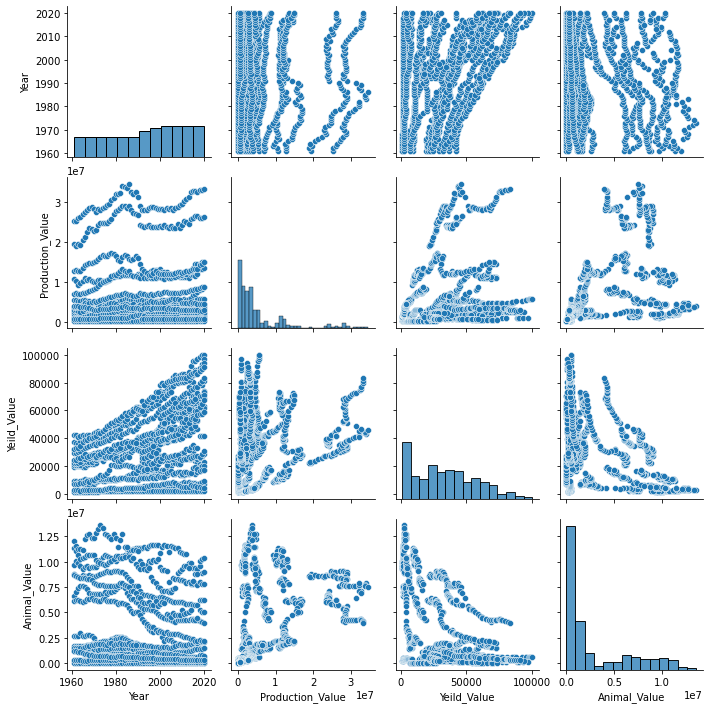

In [518]:
#to pair the data
sns.pairplot(eu_production_lp_df)

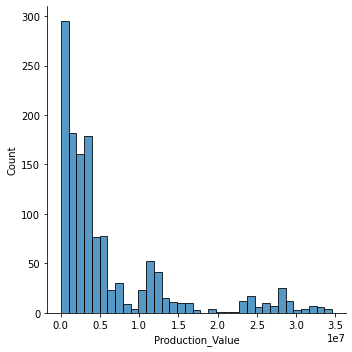

In [537]:
# to see against which feature i want to work with
sns.displot(eu_production_lp_df["Production_Value"]);


In [538]:
#eu_production_lp_df["Production_Value"]
eu_production_lp_df

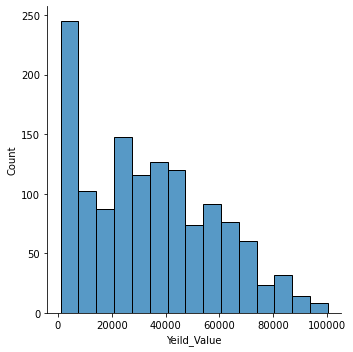

In [542]:
# to see against which feature i want to work with
sns.displot(eu_production_lp_df["Yeild_Value"]);

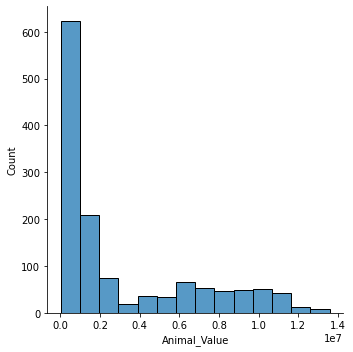

In [543]:
# to see against which feature i want to work with
sns.displot(eu_production_lp_df["Animal_Value"]);

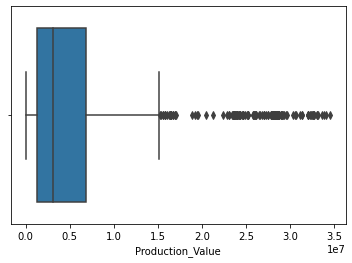

In [544]:
# boxplot Production_Value column
warnings.filterwarnings("ignore")
sns.boxplot(eu_production_lp_df["Production_Value"]);

In [539]:
eu_production_lp_df.columns

Index(['Area', 'Production_Element', 'Item', 'Year', 'Production_Unit',
       'Production_Value', 'Yeild_Element', 'Yeild_Unit', 'Yeild_Value',
       'Animal_Element', 'Animal_Unit', 'Animal_Value'],
      dtype='object')

In [540]:
eu_production_lp_df

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value
449,Austria,Production,Milk,1961,tonnes,2972611.0,Yield,hg/An,23250.0,Milk Animals,Head,1278559.0
450,Austria,Production,Milk,1962,tonnes,3064786.0,Yield,hg/An,24251.0,Milk Animals,Head,1263753.0
451,Austria,Production,Milk,1963,tonnes,3106694.0,Yield,hg/An,24919.0,Milk Animals,Head,1246704.0
452,Austria,Production,Milk,1964,tonnes,3179100.0,Yield,hg/An,25985.0,Milk Animals,Head,1223420.0
453,Austria,Production,Milk,1965,tonnes,3255700.0,Yield,hg/An,26923.0,Milk Animals,Head,1209280.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9141,Sweden,Production,Milk,2016,tonnes,2862000.0,Yield,hg/An,87759.0,Milk Animals,Head,326122.0
9142,Sweden,Production,Milk,2017,tonnes,2816660.0,Yield,hg/An,86284.0,Milk Animals,Head,326440.0
9143,Sweden,Production,Milk,2018,tonnes,2760230.0,Yield,hg/An,88172.0,Milk Animals,Head,313050.0
9144,Sweden,Production,Milk,2019,tonnes,2704390.0,Yield,hg/An,89734.0,Milk Animals,Head,301380.0


## 4.0.1 Merge milk production data with human population data
Data frame wpt_df contains world human population data

In [549]:
# now merge population with milk production data
wpt_df.tail() 
wpt_df.columns

Index(['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code',
       'Year', 'Human_Population_Total', 'Human_Populationin_agriculture',
       'Human_Populationin_agriculturePercent'],
      dtype='object')

In [548]:
#fix column name in data frame wpt_df
wpt_df.rename(columns = {'ï»¿Country_Name':'Country_Name'}, inplace = True)

In [550]:
wpt_df.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Human_Population_Total,Human_Populationin_agriculture,Human_Populationin_agriculturePercent
0,Afghanistan,AFG,Population total,SP.POP.TOTL,1960,8996967.0,NaN,NaN
1,Afghanistan,AFG,Population total,SP.POP.TOTL,1961,9169406.0,NaN,NaN
2,Afghanistan,AFG,Population total,SP.POP.TOTL,1962,9351442.0,NaN,NaN
3,Afghanistan,AFG,Population total,SP.POP.TOTL,1963,9543200.0,NaN,NaN
4,Afghanistan,AFG,Population total,SP.POP.TOTL,1964,9744772.0,NaN,NaN


In [551]:
# now merge animal production and human population data set
eu_production_inc_lp_df = pd.merge(left=eu_production_lp_df, right=wpt_df, on=None, left_on=['Area', 'Year'], right_on=['Country_Name', 'Year'])



In [554]:
eu_production_inc_lp_df.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total,Human_Populationin_agriculture,Human_Populationin_agriculturePercent
0,Austria,Production,Milk,1961,tonnes,2972611.0,Yield,hg/An,23250.0,Milk Animals,Head,1278559.0,AUT,7086299.0,NaN,NaN
1,Austria,Production,Milk,1962,tonnes,3064786.0,Yield,hg/An,24251.0,Milk Animals,Head,1263753.0,AUT,7129864.0,NaN,NaN
2,Austria,Production,Milk,1963,tonnes,3106694.0,Yield,hg/An,24919.0,Milk Animals,Head,1246704.0,AUT,7175811.0,NaN,NaN
3,Austria,Production,Milk,1964,tonnes,3179100.0,Yield,hg/An,25985.0,Milk Animals,Head,1223420.0,AUT,7223801.0,NaN,NaN
4,Austria,Production,Milk,1965,tonnes,3255700.0,Yield,hg/An,26923.0,Milk Animals,Head,1209280.0,AUT,7270889.0,NaN,NaN


In [553]:
# drop columns that are not neccessory
eu_production_inc_lp_df.drop(['Country_Name','Indicator_Name','Indicator_Code'], axis = 1, inplace = True)


In [555]:
eu_production_inc_lp_df.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total,Human_Populationin_agriculture,Human_Populationin_agriculturePercent
0,Austria,Production,Milk,1961,tonnes,2972611.0,Yield,hg/An,23250.0,Milk Animals,Head,1278559.0,AUT,7086299.0,NaN,NaN
1,Austria,Production,Milk,1962,tonnes,3064786.0,Yield,hg/An,24251.0,Milk Animals,Head,1263753.0,AUT,7129864.0,NaN,NaN
2,Austria,Production,Milk,1963,tonnes,3106694.0,Yield,hg/An,24919.0,Milk Animals,Head,1246704.0,AUT,7175811.0,NaN,NaN
3,Austria,Production,Milk,1964,tonnes,3179100.0,Yield,hg/An,25985.0,Milk Animals,Head,1223420.0,AUT,7223801.0,NaN,NaN
4,Austria,Production,Milk,1965,tonnes,3255700.0,Yield,hg/An,26923.0,Milk Animals,Head,1209280.0,AUT,7270889.0,NaN,NaN


In [ ]:
# excrct ireland data

In [558]:
# Select Rows Based on List of Column Values (countries)
values=["Ireland"]

In [559]:
Ireland_production_inc_lp_df = eu_production_inc_lp_df.loc[eu_production_inc_lp_df['Area'].isin(values)] 
print(Ireland_production_inc_lp_df)

        Area Production_Element  Item  Year Production_Unit  Production_Value  \
647  Ireland         Production  Milk  1961          tonnes         2356000.0   
648  Ireland         Production  Milk  1962          tonnes         2450800.0   
649  Ireland         Production  Milk  1963          tonnes         2461100.0   
650  Ireland         Production  Milk  1964          tonnes         2548300.0   
651  Ireland         Production  Milk  1965          tonnes         2637800.0   
652  Ireland         Production  Milk  1966          tonnes         2716600.0   
653  Ireland         Production  Milk  1967          tonnes         2951400.0   
654  Ireland         Production  Milk  1968          tonnes         3148700.0   
655  Ireland         Production  Milk  1969          tonnes         3145000.0   
656  Ireland         Production  Milk  1970          tonnes         3075600.0   
657  Ireland         Production  Milk  1971          tonnes         3161400.0   
658  Ireland         Product

## 5.0.1 Descriptive statistics and Plots
Descriptive statistics are used to describe the basic features of the data in my project. It provide a summary about the data and the measures. Together with simple graphics analysis, It form the basis of virtually every quantitative analysis of data.
Descriptive statistics can be useful for two purposes: 
1) To provide basic information about variables in a dataset

2) To highlight potential relationships between variables.

#### Mean
Calculate mean value

There are inbuilt method in pandas to calculate the mean value.

I chose get this information by writting my own function

The mean is the most common way to measure the center of a dataset. 
Missing data in the dataset can be replaced with mean value.

In [560]:
# calculate mean value
#create a function

def cal_mean(input_data):
    try:
        return sum(input_data) / len(input_data)
    except:
        print("some error occured!")
        
#use the function to calculate mean value
print('Mean value is:', cal_mean(np.array(eu_production_inc_lp_df['Production_Value'])))


Mean value is: 6057124.226001511


#### Mode
Calculate bode value There are inbuilt method in pandas to calculate the mean value.

I chose get this information by writting my own function

The mode represents the value(s) that occurs most often in a dataset. The mode tells us the most common value in categorical data when the mean and median can’t be used. The mode gives us an idea of where the 'center' of a dataset is located.


In [561]:
#calculate mode value
# there are inbuilt method in pandas to calculate the maximum value. 
# I chose get this information by writting my own function 

from collections import Counter

#create a function
def calc_mode(input_data):
    try:
        c = Counter(input_data)
        return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
    except:
        print("some error occured!")
#use the function to calculate mode value
calc_mode(np.array(eu_production_inc_lp_df['Production_Value']))

[5381800.0, 30010.0, 44415.0]